In [1]:
!pip install bangla_stemmer
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=b0cb5a356dd7941ba5920cd95d375062e3175bd96bec7c4f3aedd8872c3cb502
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [3]:
df_train = pd.read_excel("/kaggle/input/sentnob-train/sentnob_train.xlsx")

In [4]:
df_train.head()

,Text,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভালো লেগেছে,1
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না? প...,0


In [5]:
df_train.dropna(inplace=True)

In [6]:
longest_string = max(df_train["Text"], key=len)
print(len(longest_string))

374


In [7]:
df_train['Label'].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [8]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [9]:
df_val = pd.read_excel("/kaggle/input/sentnob-val/sentnob_val.xlsx")

In [10]:
df_val.dropna(inplace=True)

In [11]:
df_val['Label'].value_counts()

Label
1    623
2    590
0    354
Name: count, dtype: int64

In [12]:
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [13]:
df_val['Label'].value_counts()

Label
Positive    623
Negative    590
Neutral     354
Name: count, dtype: int64

In [14]:
longest_string = max(df_train["Text"], key=len)
print(len(longest_string))

374


In [15]:
df_train

,Text,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,Positive
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...,Negative
2,ভাই আপনার কথাই যাদু রয়েছে,Positive
3,উওরটা আমার অনেক ভালো লেগেছে,Positive
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না? প...,Neutral
...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চল...,Positive
12571,আমার সোনার বাংলা এমন রক্ষক নামের পৌঁছানো কোনো...,Negative
12572,""" ওনারা এত এত ও এত সুন্দর পরিবেশে রান্না করে ...",Positive
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকা...,Negative


In [16]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()


def remove_stopwords(text):
    # Get the list of Bengali stopwords
    bengali_stopwords = corpus.stopwords
    
    # Tokenize the Bengali text using NLTKTokenizer
    word_tokens = bnltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in word_tokens if token not in bengali_stopwords]
    
    # Join the filtered tokens back into a text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text


In [17]:
df_train['Text'] = df_train['Text'].apply(remove_stopwords)
df_val['Text'] = df_val['Text'].apply(remove_stopwords)

In [18]:
longest_string = max(df_train["Text"], key=len)
print(len(longest_string))

278


In [19]:
df_train['Text']

0        মুগ্ধ হয়ে গেলাম মামু. তোমায় কমু. বলো তোমায় কোথ...
1        কুত্তার বাচ্চাদের দেশটা অবস্তায় তিনটা পুলিশ তর...
2                                      ভাই কথাই যাদু রয়েছে
3                                        উওরটা ভালো লেগেছে
4                                   সাজেক ? প্রাইভেট কার ?
                               ...                        
12570    বর্ডারে লেট হয়ে যাওয়াতে জিপে যাই বিকাল 4 টার শ...
12571    সোনার বাংলা রক্ষক নামের পৌঁছানো জায়গা । মাননীয়...
12572    `` ওনারা সুন্দর পরিবেশে রান্না বাসাবাড়ি ছাড়া স...
12573                  বাংলাদেশ পুলিশ চাই ধরনে পুলিশ দরকার
12574           বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু
Name: Text, Length: 12575, dtype: object

In [20]:
longest_string = max(df_train["Text"], key=len)
print(len(longest_string))

278


In [21]:
df_train['Text'] 

0        মুগ্ধ হয়ে গেলাম মামু. তোমায় কমু. বলো তোমায় কোথ...
1        কুত্তার বাচ্চাদের দেশটা অবস্তায় তিনটা পুলিশ তর...
2                                      ভাই কথাই যাদু রয়েছে
3                                        উওরটা ভালো লেগেছে
4                                   সাজেক ? প্রাইভেট কার ?
                               ...                        
12570    বর্ডারে লেট হয়ে যাওয়াতে জিপে যাই বিকাল 4 টার শ...
12571    সোনার বাংলা রক্ষক নামের পৌঁছানো জায়গা । মাননীয়...
12572    `` ওনারা সুন্দর পরিবেশে রান্না বাসাবাড়ি ছাড়া স...
12573                  বাংলাদেশ পুলিশ চাই ধরনে পুলিশ দরকার
12574           বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু
Name: Text, Length: 12575, dtype: object

In [22]:
X_train  =  df_train['Text'].values.tolist()
y_train = df_train['Label'].tolist()

In [23]:
X_test =  df_val['Text'].values.tolist()
y_test = df_val['Label'].tolist()

In [24]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 29.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 12.5 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=0847846c274f1e3a3b0a362d93201d995f7bea4539b59da29b619dde733b22a2
  Stored in directory: /roo

In [25]:
import ktrain
from ktrain import text
MODEL_NAME = 'FacebookAI/xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [26]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 11
	95percentile : 26
	99percentile : 33


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 11
	95percentile : 26
	99percentile : 33


In [27]:
print(trn)

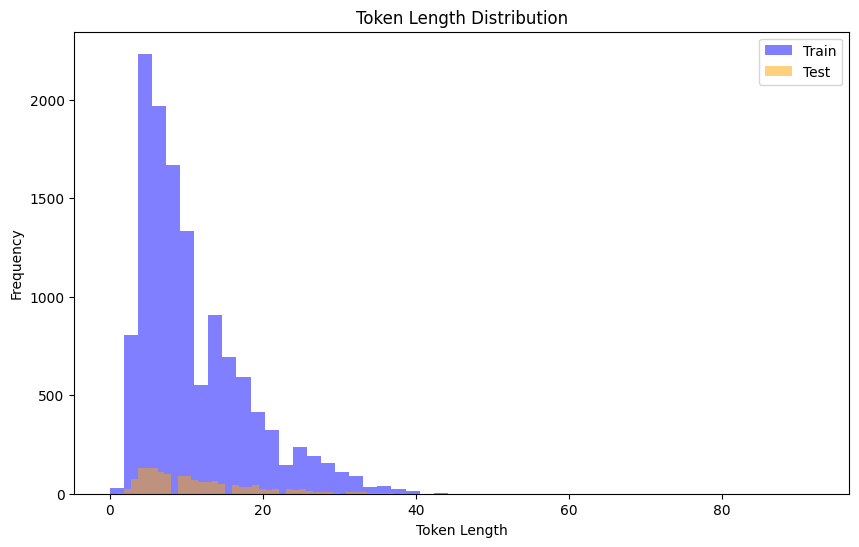

In [28]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [29]:
model = t.get_classifier()

In [30]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [31]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [32]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1572/1572 [==============================] - 975s 603ms/step - loss: 0.9888 - accuracy: 0.5079 - val_loss: 0.8585 - val_accuracy: 0.6133
Epoch 2/10
1572/1572 [==============================] - 945s 601ms/step - loss: 0.8609 - accuracy: 0.6111 - val_loss: 0.8004 - val_accuracy: 0.6414
Epoch 3/10
1572/1572 [==============================] - 945s 601ms/step - loss: 0.7989 - accuracy: 0.6429 - val_loss: 0.8226 - val_accuracy: 0.6375
Epoch 4/10
1572/1572 [==============================] - 945s 601ms/step - loss: 0.7427 - accuracy: 0.6800 - val_loss: 0.7975 - val_accuracy: 0.6407
Epoch 5/10
1572/1572 [==============================] - 944s 601ms/step - loss: 0.6936 - accuracy: 0.7001 - val_loss: 1.0760 - val_accuracy: 0.3976
Epoch 6/10
1572/1572 [==============================] - 945s 601ms/step - loss: 1.0782 - accuracy: 0.3963 - val_loss: 1.0717 - val_accuracy: 0.3976
Epoch 7/10
1572/1572 [===========================

In [33]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [34]:
classes=t.get_classes()

In [35]:
cm = learner.validate(class_names=t.get_classes())

49/49 [==============================] - 10s 136ms/step
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       590
     Neutral       0.00      0.00      0.00       354
    Positive       0.40      1.00      0.57       623

    accuracy                           0.40      1567
   macro avg       0.13      0.33      0.19      1567
weighted avg       0.16      0.40      0.23      1567



In [36]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [37]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)


In [38]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [39]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [40]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")